# Import packages

In [110]:
library(dplyr)
library(haven)
library(tidyverse)
#library(labeld)

In [111]:
library(lmtest)
library(sandwich)
library(grf)
library(glmnet)
library(splines)
library(ggplot2)
library(reshape2)

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'grf' was built under R version 4.1.3"
Warning message:
"package 'glmnet' was built under R version 4.1.3"
Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-3

Warning message:
"package 'reshape2' was built under R version 4.1.3"

Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




# 1. average treatment effect in the randomized experiment

In [112]:
star <- read_sav("C:/Users/Alexander/Documents/GitHub/ECO293/data/Project_STAR/PROJECT_STAR/STAR_Students.sav")
names(star)<-tolower(names(star))
options(stringAsFactors=FALSE)

Failed to find G1READ_A
Failed to find G1MATH_A
Failed to find G2READ_A
Failed to find G2MATH_A
Failed to find G3READ_A
Failed to find G3MATH_A


In [113]:
star$g1classtype

<labelled<double>[11601]>: CLASSROOM TYPE GRADE 1
    [1]  3 NA NA  2 NA NA NA NA  2 NA  3  3 NA NA NA  3 NA NA NA NA NA NA  1 NA
   [25] NA NA  1 NA NA NA NA NA  2  3 NA NA NA NA NA  2 NA  2  2  1 NA  1 NA  3
   [49] NA  3 NA  1 NA  2  3  3 NA  2 NA  3  3 NA NA NA NA NA NA NA NA NA  3  2
   [73] NA NA  2 NA NA NA NA NA NA NA NA NA NA  3 NA NA NA NA NA NA  2 NA NA  3
   [97]  3  3  1 NA  3 NA NA NA  3  3  1  3  2 NA NA NA NA NA  1 NA NA NA  3  2
  [121] NA NA NA  2 NA NA NA NA NA NA  2 NA  1  3 NA NA  2 NA NA NA  1 NA NA NA
  [145] NA  1  2 NA NA NA NA NA  2 NA  3  2 NA NA  1 NA NA NA NA NA NA NA NA NA
  [169] NA NA NA NA NA NA NA  1 NA NA NA  1 NA  3 NA NA NA NA  1 NA  3 NA NA  3
  [193]  3  2 NA NA NA NA NA  3 NA NA NA NA NA NA NA NA NA NA  3 NA NA  2 NA  1
  [217] NA NA NA NA NA NA NA  3 NA  2 NA NA NA NA NA NA NA NA NA  3 NA NA NA NA
  [241] NA NA  3 NA NA NA  2 NA NA NA NA NA  3 NA  2 NA NA NA NA  2 NA  2  2  1
  [265] NA  2 NA NA NA NA  1 NA NA  3 NA  2 NA  1 NA NA  2  1  3  3 NA

In [114]:
star <- star[!(star$g1classtype== 3 ),]

In [115]:
star$g1classtype[star$g1classtype == 1] <- 1

In [116]:
star$g1classtype[star$g1classtype == 2] <- 0

In [117]:
star$g1classtype

<labelled<double>[9281]>: CLASSROOM TYPE GRADE 1
   [1] NA NA  0 NA NA NA NA  0 NA NA NA NA NA NA NA NA NA NA  1 NA NA NA  1 NA
  [25] NA NA NA NA  0 NA NA NA NA NA  0 NA  0  0  1 NA  1 NA NA NA  1 NA  0 NA
  [49]  0 NA NA NA NA NA NA NA NA NA NA  0 NA NA  0 NA NA NA NA NA NA NA NA NA
  [73] NA NA NA NA NA NA NA  0 NA NA  1 NA NA NA NA  1  0 NA NA NA NA NA  1 NA
  [97] NA NA  0 NA NA NA  0 NA NA NA NA NA NA  0 NA  1 NA NA  0 NA NA NA  1 NA
 [121] NA NA NA  1  0 NA NA NA NA NA  0 NA  0 NA NA  1 NA NA NA NA NA NA NA NA
 [145] NA NA NA NA NA NA NA NA  1 NA NA NA  1 NA NA NA NA NA  1 NA NA NA  0 NA
 [169] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  0 NA  1 NA NA NA NA NA
 [193] NA NA NA  0 NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  0 NA
 [217] NA NA NA NA NA  0 NA NA NA NA  0 NA  0  0  1 NA  0 NA NA NA NA  1 NA NA
 [241] NA  0 NA  1 NA NA  0  1 NA  1 NA NA NA NA  0 NA NA NA  0 NA  0 NA  1  0
 [265]  0 NA  1  0 NA  1  0 NA NA  0  1 NA  1  1 NA  0 NA NA NA  1 NA NA NA NA
 [2

In [118]:
#ate
ate_est <- mean(star$g1tmathss[star$g1classtype==1], na.rm = TRUE) - mean(star$g1tmathss[star$g1classtype==0], na.rm = TRUE)

ate_est

#confidence intervals
ate_se <- sqrt(var(star$g1tmathss[star$g1classtype == 1], na.rm = TRUE) / sum(star$g1classtype == 1, na.rm = TRUE) + var(star$g1tmathss[star$g1classtype == 0], na.rm = TRUE) / sum(star$g1classtype == 0, na.rm = TRUE))

ate_se

print(paste0("95% CI: ", round(ate_est),
" +/- ", round(1.96 * ate_se)))

[1] 13.39563

[1] 1.297031

[1] "95% CI: 13 +/- 3"


In [76]:
colnames(star)

[1] "stdntid"          "gender"           "race"            
  [4] "birthmonth"       "birthday"         "birthyear"       
  [7] "flagsgk"          "flagsg1"          "flagsg2"         
 [10] "flagsg3"          "flaggk"           "flagg1"          
 [13] "flagg2"           "flagg3"           "flagg4"          
 [16] "flagg5"           "flagg6"           "flagg7"          
 [19] "flagg8"           "flagprt4"         "flagidn8"        
 [22] "flagprt8"         "flagsatact"       "flaghscourse"    
 [25] "flaghsgraduate"   "gkclasstype"      "g1classtype"     
 [28] "g2classtype"      "g3classtype"      "cmpstype"        
 [31] "cmpsdura"         "yearsstar"        "yearssmall"      
 [34] "gkschid"          "gksurban"         "gktchid"         
 [37] "gktgen"           "gktrace"          "gkthighdegree"   
 [40] "gktcareer"        "gktyears"         "gkclasssize"     
 [43] "gkfreelunch"      "gkrepeat"         "gkspeced"        
 [46] "gkspecin"         "gkpresent"        "gkabsent"        
 [49] "gktreadss"        "gktmathss"        "gktlistss"       
 [52] "gkwordskillss"    "gkmotivraw"       "gkselfconcraw"   
 [55] "g1schid"          "g1surban"         "g1tchid"         
 [58] "g1tgen"           "g1trace"          "g1thighdegree"   
 [61] "g1tcareer"        "g1tyears"         "g1classsize"     
 [64] "g1freelunch"      "g1promote"        "g1speced"        
 [67] "g1specin"         "g1present"        "g1absent"        
 [70] "g1treadss"        "g1tmathss"        "g1tlistss"       
 [73] "g1wordskillss"    "g1readbsraw"      "g1mathbsraw"     
 [76] "g1readbsobjraw"   "g1mathbsobjraw"   "g1readbsobjpct"  
 [79] "g1mathbsobjpct"   "g1motivraw"       "g1selfconcraw"   
 [82] "g2schid"          "g2surban"         "g2tchid"         
 [85] "g2tgen"           "g2trace"          "g2thighdegree"   
 [88] "g2tcareer"        "g2tyears"         "g2ttrain"        
 [91] "g2classsize"      "g2freelunch"      "g2promote"       
 [94] "g2treadss"        "g2tmathss"        "g2tlistss"       
 [97] "g2wordskillss"    "g2readbsraw"      "g2mathbsraw"     
[100] "g2readbsobjraw"   "g2mathbsobjraw"   "g2readbsobjpct"  
[103] "g2mathbsobjpct"   "g2motivraw"       "g2selfconcraw"   
[106] "g3schid"          "g3surban"         "g3tchid"         
[109] "g3tgen"           "g3trace"          "g3thighdegree"   
[112] "g3tcareer"        "g3tyears"         "g3ttrain"        
[115] "g3classsize"      "g3freelunch"      "g3promote"       
[118] "g3present"        "g3absent"         "g3treadss"       
[121] "g3tmathss"        "g3tlangss"        "g3tlistss"       
[124] "g3sciencess"      "g3socialsciss"    "g3spellss"       
[127] "g3vocabss"        "g3mathcomputss"   "g3mathnumconcss" 
[130] "g3mathapplss"     "g3wordskillss"    "g3readbsraw"     
[133] "g3mathbsraw"      "g3readbsobjraw"   "g3mathbsobjraw"  
[136] "g3readbsobjpct"   "g3mathbsobjpct"   "g3motivraw"      
[139] "g3selfconcraw"    "g4schid"          "g4surban"        
[142] "g4tchid"          "g4tgen"           "g4trace"         
[145] "g4nclass"         "g4nwhite"         "g4nblack"        
[148] "g4nother"         "g4pernwh"         "g4nfreelunch"    
[151] "g4treadss"        "g4tmathss"        "g4tlangss"       
[154] "g4tbattss"        "g4sciencess"      "g4socialsciss"   
[157] "g4readcomprehss"  "g4spellss"        "g4vocabss"       
[160] "g4mathcomputss"   "g4mathconcapplss" "g4langexpss"     
[163] "g4langmechss"     "g4studyskillss"   "g4readbsobjraw"  
[166] "g4mathbsobjraw"   "g4ptattn"         "g4pthwrk"        
[169] "g4ptothr"         "g4ptmtrl"         "g4ptlate"        
[172] "g4ptries"         "g4ptrstl"         "g4ptdisc"        
[175] "g4ptwork"         "g4ptimpt"         "g4ptrepr"        
[178] "g4ptanoy"         "g4ptpers"         "g4ptknow"        
[181] "g4ptextr"         "g4ptwthd"         "g4ptefrt"        
[184] "g4ptcrit"         "g4ptasks"         "g4ptalks"        
[187] "g4ptintv"         "g4pteasy"         "g4ptcrts"        
[190] "g4ptfnsh"         "g4ptrai

# 2 Describe your method(s) for systematically deleting some observations as a function of X’s

In [119]:
names(star)[names(star) == 'g1classtype'] <- "W"

In [120]:
# copying old dataset, just in case
data.exp <- star
data <- star

In [121]:
data$W

<labelled<double>[9281]>: CLASSROOM TYPE GRADE 1
   [1] NA NA  0 NA NA NA NA  0 NA NA NA NA NA NA NA NA NA NA  1 NA NA NA  1 NA
  [25] NA NA NA NA  0 NA NA NA NA NA  0 NA  0  0  1 NA  1 NA NA NA  1 NA  0 NA
  [49]  0 NA NA NA NA NA NA NA NA NA NA  0 NA NA  0 NA NA NA NA NA NA NA NA NA
  [73] NA NA NA NA NA NA NA  0 NA NA  1 NA NA NA NA  1  0 NA NA NA NA NA  1 NA
  [97] NA NA  0 NA NA NA  0 NA NA NA NA NA NA  0 NA  1 NA NA  0 NA NA NA  1 NA
 [121] NA NA NA  1  0 NA NA NA NA NA  0 NA  0 NA NA  1 NA NA NA NA NA NA NA NA
 [145] NA NA NA NA NA NA NA NA  1 NA NA NA  1 NA NA NA NA NA  1 NA NA NA  0 NA
 [169] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  0 NA  1 NA NA NA NA NA
 [193] NA NA NA  0 NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  0 NA
 [217] NA NA NA NA NA  0 NA NA NA NA  0 NA  0  0  1 NA  0 NA NA NA NA  1 NA NA
 [241] NA  0 NA  1 NA NA  0  1 NA  1 NA NA NA NA  0 NA NA NA  0 NA  0 NA  1  0
 [265]  0 NA  1  0 NA  1  0 NA NA  0  1 NA  1  1 NA  0 NA NA NA  1 NA NA NA NA
 [2

In [122]:
data$g4surban

<labelled<double>[9281]>: SCHOOL URBANICITY GRADE 4
   [1] NA NA  3 NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [25] NA NA NA NA  1 NA NA NA NA NA  3 NA NA  3 NA NA NA NA NA NA NA NA NA NA
  [49] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [73] NA NA NA NA NA NA NA  3 NA NA  3 NA NA NA NA NA  3 NA NA NA NA NA NA NA
  [97] NA NA NA NA NA NA  2 NA NA NA NA NA NA  2 NA NA NA NA NA NA NA NA NA NA
 [121] NA NA NA  3 NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [145] NA NA NA NA NA NA NA NA  2 NA NA NA  4 NA NA NA NA NA  2 NA NA NA NA NA
 [169] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  3 NA NA NA NA NA
 [193] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  4 NA
 [217] NA NA NA NA NA  3 NA NA NA NA NA NA NA  3  2 NA  4 NA NA NA NA NA NA NA
 [241] NA NA NA  2 NA NA  3  2 NA  3 NA NA NA NA NA NA NA NA NA NA  2 NA NA  3
 [265]  3 NA NA NA NA NA NA NA NA NA NA NA  3  2 NA NA NA NA NA NA NA NA NA NA


In [123]:
data$race

<labelled<double>[9281]>: STUDENT RACE/ETHNICITY
   [1] NA NA  1 NA NA NA NA  2 NA NA NA NA NA NA NA NA NA NA  2 NA NA NA  1 NA
  [25] NA NA NA NA  2 NA NA NA NA NA  1 NA  1  1  1 NA  1 NA NA NA  2 NA  2 NA
  [49]  1 NA NA NA NA NA NA NA NA NA NA  2 NA NA  2 NA NA NA NA NA NA NA NA NA
  [73] NA NA NA NA NA NA NA  1 NA NA  1 NA NA NA NA  1  1 NA NA NA NA NA  1 NA
  [97] NA NA  1 NA NA NA  6 NA NA NA NA NA NA  1 NA  2 NA NA  1 NA NA NA  2 NA
 [121] NA NA NA  1  1 NA NA NA NA NA  1 NA  1 NA NA  2 NA NA NA NA NA NA NA NA
 [145] NA NA NA NA NA NA NA NA  2 NA NA NA  1 NA NA NA NA NA  1 NA NA NA  2 NA
 [169] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  2 NA  1 NA NA NA NA NA
 [193] NA NA NA  1 NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  1 NA
 [217] NA NA NA NA NA  1 NA NA NA NA  1 NA  1  1  2 NA  1 NA NA NA NA  1 NA NA
 [241] NA  1 NA  1 NA NA  1  1 NA  1 NA NA NA NA  1 NA NA NA  1 NA  1 NA  1  1
 [265]  1 NA  1  1 NA  2  1 NA NA  2  1 NA  1  1 NA  1 NA NA NA  1 NA NA NA NA
 [2

In [124]:
# defining the group that we will be dropped with some high probability
grp <- ((data$W == 1) &  # if treated AND...
        (
            (data$race == 2) |     # belongs an older group OR
            (data$g4surban == 3)   # more conservative
        )) | # OR
        ((data$W == 0) &  # if untreated AND...
        (
            (data$race == 1 ) |     # belongs a younger group OR
            (data$g4surban == 4)   # more liberal
        )) 

# Individuals in the group above have a small chance of being kept in the sample
prob.keep <- ifelse(grp, .15, .85)
keep.idx <- as.logical(rbinom(n=nrow(data), prob=prob.keep, size = 1))

Warning message in rbinom(n = nrow(data), prob = prob.keep, size = 1):
"NAs produced"


In [125]:
# Dropping
star <- data[keep.idx,]

In [126]:
star

stdntid,gender,race,birthmonth,birthday,birthyear,flagsgk,flagsg1,flagsg2,flagsg3,...,hsactcomp,hsacttot,hsactenglish,hsactmath,hsactread,hsactscience,hssatconverted,hsactconverted,hsgrdadd,hsgrdcol
<dbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl+lbl>,<dbl+lbl>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


# 2.1 new difference-in-means point estimate of the treatment effect is significantly different

In [127]:
#ate
ate_est <- mean(star$g1tmathss[star$W==1], na.rm = TRUE) - mean(star$g1tmathss[star$W==0], na.rm = TRUE)

ate_est

#confidence intervals
ate_se <- sqrt(var(star$g1tmathss[star$W == 1], na.rm = TRUE) / sum(star$W == 1, na.rm = TRUE) + var(star$g1tmathss[star$W == 0], na.rm = TRUE) / sum(star$W == 0, na.rm = TRUE))

ate_se

print(paste0("95% CI: ", round(ate_est),
" +/- ", round(1.96 * ate_se)))

[1] 18.68043

[1] 2.906644

[1] "95% CI: 19 +/- 6"


# 2.2 Propensity Score

In [128]:
star$W

<labelled<double>[6868]>: CLASSROOM TYPE GRADE 1
   [1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [25] NA NA  0 NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [49] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
  [73]  0 NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  0 NA NA NA
  [97] NA NA NA NA  1 NA NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA  0 NA NA
 [121] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [145]  1 NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [169] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [193] NA NA NA NA NA NA NA NA NA NA NA NA  0 NA NA NA NA NA NA NA NA NA NA NA
 [217]  1 NA NA  1 NA NA NA NA NA NA NA NA NA NA NA  0 NA NA  0 NA NA NA NA NA
 [241] NA NA NA NA NA NA NA NA NA NA NA NA  1 NA NA NA NA NA  0 NA NA NA NA NA
 [265] NA NA NA NA NA NA NA NA NA NA NA NA NA NA  0 NA NA NA NA NA NA NA NA NA
 [2

In [129]:
require("dplyr")

In [130]:
df %>%
  filter(!if_all(c("gender", "race", "flagsgk", "gktrace", "g4surban"), is.na))

ERROR: Error in UseMethod("filter"): no applicable method for 'filter' applied to an object of class "function"


In [131]:
star_2 <- star[complete.cases(star$gender, star$race, star$flagsgk, star$gktrace, star$g4surban, star$W, star$g1tmathss),]
star_2$W

<labelled<double>[430]>: CLASSROOM TYPE GRADE 1
  [1] 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0
 [38] 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 [75] 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1
[112] 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1
[149] 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1
[186] 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
[223] 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0
[260] 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
[297] 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0
[334] 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0
[371] 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0
[408] 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0

Labels:
 value     

In [132]:
# Additional covariates
covariates <- c("gender", "race", "flagsgk", "gktrace", "g4surban")

In [133]:
# Estimate the propensity score e(X) via logistic regression using splines
fmla <- as.formula(paste0("~", paste0("bs(", covariates, ", df=3)", collapse="+")))

In [134]:
Z <- star_2$W
Y <- star_2$g1tmathss
XX <- model.matrix(fmla, star_2)
logit <- cv.glmnet(x=XX, y=Z, family="binomial")
e.hat <- predict(logit, XX, s = "lambda.min", type="response")

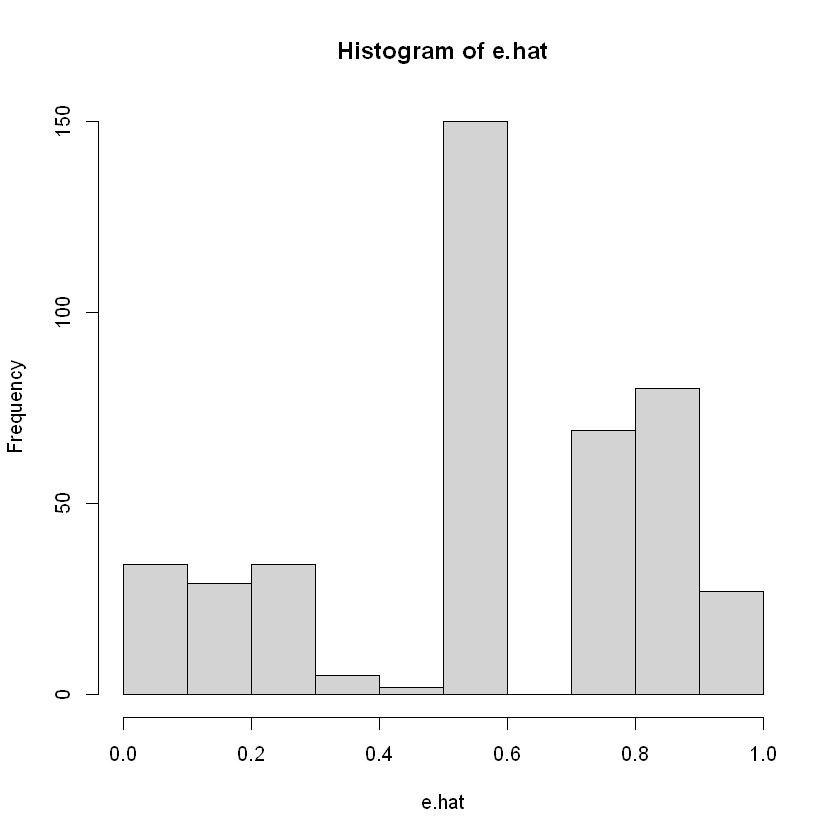

In [135]:
hist(e.hat) 

# 3.1 The difference in means estimator (which would be appropriate in an RCT).

In [136]:
#ate
ate_est <- mean(star_2$g1tmathss[star_2$W==1], na.rm = TRUE) - mean(star_2$g1tmathss[star_2$W==0], na.rm = TRUE)

ate_est

#confidence intervals
ate_se <- sqrt(var(star_2$g1tmathss[star_2$W == 1], na.rm = TRUE) / sum(star_2$W == 1, na.rm = TRUE) + var(star_2$g1tmathss[star_2$W == 0], na.rm = TRUE) / sum(star_2$W == 0, na.rm = TRUE))

ate_se

print(paste0("95% CI: ", round(ate_est),
" +/- ", round(1.96 * ate_se)))

[1] 16.2021

[1] 3.758482

[1] "95% CI: 16 +/- 7"


# 3.2  Simple linear regression, i.e., fit Y ~ X + W and interpret the W-coefficient as the ATE.

In [123]:
fmla <- g1tmathss ~ (W + gender + race + flagsgk + gktrace+ g4surban)
fmla

g1tmathss ~ (W + gender + race + flagsgk + gktrace + g4surban)

In [124]:
regbasic <- lm(fmla, data=star_2)
summary(regbasic) 


Call:
lm(formula = fmla, data = star_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-103.941  -24.372   -1.116   23.071  134.219 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 559.28382   15.24726  36.681  < 2e-16 ***
W            17.31228    4.44718   3.893 0.000115 ***
gender       -5.84779    3.89054  -1.503 0.133576    
race        -17.66445    5.33607  -3.310 0.001013 ** 
flagsgk            NA         NA      NA       NA    
gktrace      11.64531    6.67468   1.745 0.081774 .  
g4surban      0.07057    2.60316   0.027 0.978387    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.69 on 417 degrees of freedom
Multiple R-squared:  0.1108,	Adjusted R-squared:  0.1001 
F-statistic: 10.39 on 5 and 417 DF,  p-value: 2.093e-09


In [125]:
ols <- lm(fmla, data=star_2)
coeftest(ols, vcov=vcovHC(ols, type='HC2'))[2,]

Estimate   Std. Error      t value     Pr(>|t|) 
1.731228e+01 4.317378e+00 4.009905e+00 7.197413e-05

# 3.3 AIPW with cross-fitting, using a machine learning method of your choice.

In [143]:
data <- star_2

In [144]:
# Available in randomized settings and observational settings with unconfoundedness+overlap

# A list of vectors indicating the left-out subset
n <- nrow(data)
n.folds <- 5
indices <- split(seq(n), sort(seq(n) %% n.folds))

# Preparing data
W <- data$W
Y <- data$g1tmathss
covariates <- c("gender", "race", "flagsgk", "gktrace", "g4surban")

In [145]:
# Matrix of (transformed) covariates used to estimate E[Y|X,W]
fmla.xw <- formula(paste("~ 0 +", paste0("bs(", covariates, ", df=3)", "*", W, collapse=" + ")))
XW <- model.matrix(fmla.xw, data)
# Matrix of (transformed) covariates used to predict E[Y|X,W=w] for each w in {0, 1}
data.1 <- data
data.1$W <- 1
XW1 <- model.matrix(fmla.xw, data.1)  # setting W=1
data.0 <- data
data.0$W <- 0
XW0 <- model.matrix(fmla.xw, data.0)  # setting W=0

In [146]:
# Matrix of (transformed) covariates used to estimate and predict e(X) = P[W=1|X]
fmla.x <- formula(paste(" ~ 0 + ", paste0("bs(", covariates, ", df=3)", collapse=" + ")))
XX <- model.matrix(fmla.x, data)

In [147]:
# (Optional) Not penalizing the main effect (the coefficient on W)
penalty.factor <- rep(1, ncol(XW))
penalty.factor[colnames(XW) == W] <- 0

ERROR: Error: Can't recycle `..1` (size 15) to match `..2` (size 430).


In [148]:
# Cross-fitted estimates of E[Y|X,W=1], E[Y|X,W=0] and e(X) = P[W=1|X]
mu.hat.1 <- rep(NA, n)
mu.hat.0 <- rep(NA, n)
e.hat <- rep(NA, n)
for (idx in indices) {
  # Estimate outcome model and propensity models
  # Note how cross-validation is done (via cv.glmnet) within cross-fitting! 
  outcome.model <- cv.glmnet(x=XW[-idx,], y=Y[-idx], family="gaussian", penalty.factor=penalty.factor)
  propensity.model <- cv.glmnet(x=XX[-idx,], y=W[-idx], family="binomial")

  # Predict with cross-fitting
  mu.hat.1[idx] <- predict(outcome.model, newx=XW1[idx,], type="response")
  mu.hat.0[idx] <- predict(outcome.model, newx=XW0[idx,], type="response")
  e.hat[idx] <- predict(propensity.model, newx=XX[idx,], type="response")
}

# Commpute the summand in AIPW estimator
aipw.scores <- (mu.hat.1 - mu.hat.0
                + W / e.hat * (Y -  mu.hat.1)
                - (1 - W) / (1 - e.hat) * (Y -  mu.hat.0))

# Tally up results
ate.aipw.est <- mean(aipw.scores)
ate.aipw.se <- sd(aipw.scores) / sqrt(n)
ate.aipw.tstat <- ate.aipw.est / ate.aipw.se
ate.aipw.pvalue <- 2*(pnorm(1 - abs(ate.aipw.tstat)))
ate.aipw.results <- c(estimate=ate.aipw.est, std.error=ate.aipw.se, t.stat=ate.aipw.tstat, pvalue=ate.aipw.pvalue)
print(ate.aipw.results)

 estimate std.error    t.stat    pvalue 
8.6555157 3.5945768 2.4079374 0.1591496 


In [149]:
penalty.factor

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1